In [76]:
import cv2
import numpy as np
import math
from commonfunctions import *
from scipy.ndimage import interpolation as inter

In [89]:
def biggest_contour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        #if area > 1000:
        peri = cv2.arcLength(i, True)
        approx = cv2.approxPolyDP(i, 0.015 * peri, True)
        if area > max_area and len(approx) == 4:
            biggest = approx
            max_area = area
    return biggest

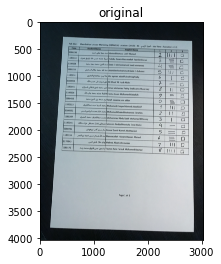

In [323]:
img = cv2.imread('../15.jpg')
show_images([img], ['original'])

img_original = img.copy()

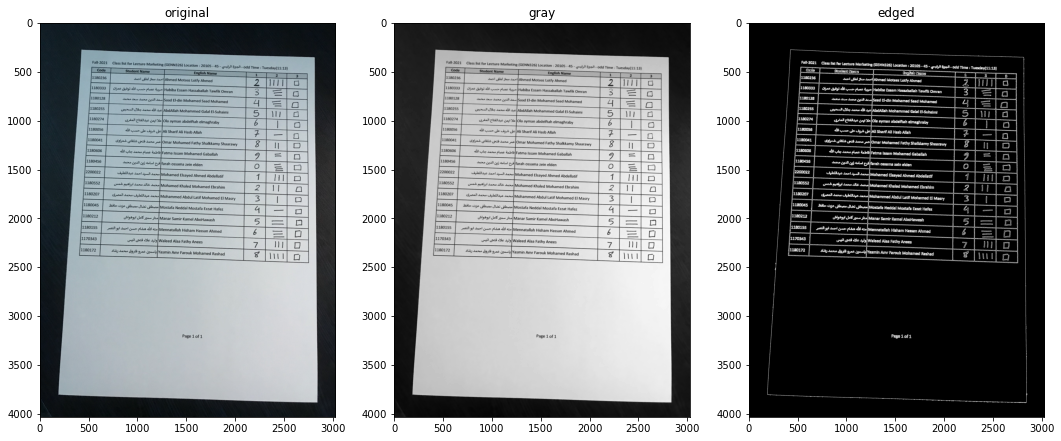

In [324]:


# Image modification
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 20, 30, 30)

# grad_x = cv2.Sobel(gray, -1, 1, 0)
# # Gradient-Y

# grad_y = cv2.Sobel(gray, -1, 0, 1)


# abs_grad_x = cv2.convertScaleAbs(grad_x)
# abs_grad_y = cv2.convertScaleAbs(grad_y)


# grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

edged = cv2.Canny(gray, 20, 120)
edged = cv2.dilate(edged.copy(), None, 1)
show_images([img, gray, edged], ['original', 'gray','edged'])


In [348]:
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
for c in contours:
    cv2.drawContours(img, [c], -1, (0, 255, 0), 3) #######################################


In [349]:
biggest = biggest_contour(contours)

#cv2.drawContours(img, [biggest], -1, (0, 255, 0), 3)

In [350]:
points = biggest.reshape(4, 2)
input_points = np.zeros((4, 2), dtype="float32")

In [351]:
points_sum = points.sum(axis=1)
input_points[0] = points[np.argmin(points_sum)]
input_points[3] = points[np.argmax(points_sum)]

points_diff = np.diff(points, axis=1)
input_points[1] = points[np.argmin(points_diff)]
input_points[2] = points[np.argmax(points_diff)]


In [352]:
(top_left, top_right, bottom_right, bottom_left) = input_points
bottom_width = np.sqrt(((bottom_right[0] - bottom_left[0]) ** 2) + ((bottom_right[1] - bottom_left[1]) ** 2))
top_width = np.sqrt(((top_right[0] - top_left[0]) ** 2) + ((top_right[1] - top_left[1]) ** 2))
right_height = np.sqrt(((top_right[0] - bottom_right[0]) ** 2) + ((top_right[1] - bottom_right[1]) ** 2))
left_height = np.sqrt(((top_left[0] - bottom_left[0]) ** 2) + ((top_left[1] - bottom_left[1]) ** 2))

In [353]:
# Output image size
max_width = max(int(bottom_width), int(top_width))
# max_height = max(int(right_height), int(left_height))
max_height = int(max_width * 0.9)  # for A4

# Desired points values in the output image
converted_points = np.float32([[0, 0], [max_width, 0], [0, max_height], [max_width, max_height]])

In [354]:
# Perspective transformation
matrix = cv2.getPerspectiveTransform(input_points, converted_points)
img_output = cv2.warpPerspective(img_original, matrix, (max_width, max_height))

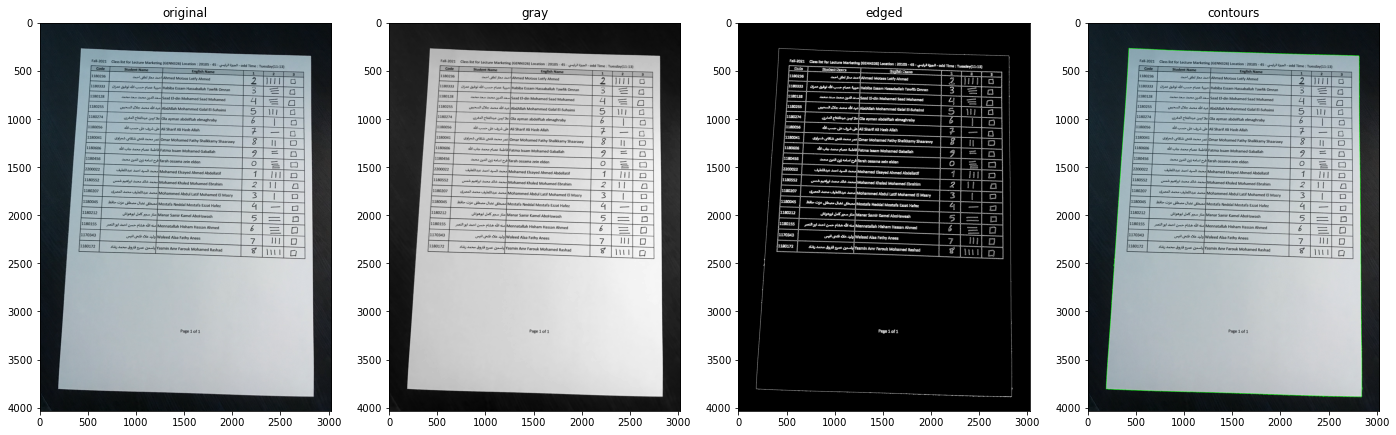

In [355]:
show_images([img_original, gray, edged, img], ['original','gray','edged','contours'])


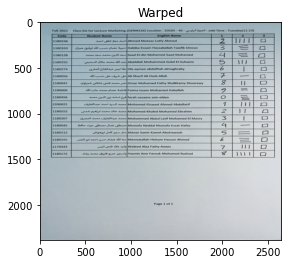

In [356]:
show_images([img_output], ['Warped'])